# Sales Data Analysis Project

## Objective 
The goal of this project is to analyze sales data and identify monthly and seasonal revenue trends using python and pandas.

## Dataset Description
The dataset contains the following columns:
-Date
-Product
-Quality
-Revenue

In [1]:
import pandas as pd

In [3]:
data = {
    "Date": [
        "05-01-2025", "10-01-2025", "15-01-2025",
        "01-02-2025", "08-02-2025", "15-02-2025",
        "05-03-2025", "10-03-2025", "20-03-2025"
    ],
    "Product": [
        "Laptop", "Phone", "Tablet",
        "Laptop", "Chair", "Phone",
        "Tablet", "Laptop", "Chair"
    ],
    "Category": [
        "Electronics", "Electronics", "Electronics",
        "Electronics", "Furniture", "Electronics",
        "Electronics", "Electronics", "Furniture"
    ],
    "Price": [
        50000, 30000, None,
        52000, 2500, 28000,
        20000, None, 2700
    ],
    "Quantity": [
        2, 3, 1,
        None, 4, 2,
        3, 1, None
    ]
}

df = pd.DataFrame(data)
df

,Date,Product,Category,Price,Quantity
0,05-01-2025,Laptop,Electronics,50000.0,2.0
1,10-01-2025,Phone,Electronics,30000.0,3.0
2,15-01-2025,Tablet,Electronics,NaN,1.0
3,01-02-2025,Laptop,Electronics,52000.0,NaN
4,08-02-2025,Chair,Furniture,2500.0,4.0
5,15-02-2025,Phone,Electronics,28000.0,2.0
6,05-03-2025,Tablet,Electronics,20000.0,3.0
7,10-03-2025,Laptop,Electronics,NaN,1.0
8,20-03-2025,Chair,Furniture,2700.0,NaN


In [5]:
df.to_csv("sales_data.csv", index = False)

In [6]:
df.isnull().sum()

Date        0
Product     0
Category    0
Price       2
Quantity    2
dtype: int64

In [9]:
# Data understanding

In [10]:
df.head()

,Date,Product,Category,Price,Quantity
0,05-01-2025,Laptop,Electronics,50000.0,2.0
1,10-01-2025,Phone,Electronics,30000.0,3.0
2,15-01-2025,Tablet,Electronics,NaN,1.0
3,01-02-2025,Laptop,Electronics,52000.0,NaN
4,08-02-2025,Chair,Furniture,2500.0,4.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9 non-null      object 
 1   Product   9 non-null      object 
 2   Category  9 non-null      object 
 3   Price     7 non-null      float64
 4   Quantity  7 non-null      float64
dtypes: float64(2), object(3)
memory usage: 492.0+ bytes


In [12]:
df.describe()

,Price,Quantity
count,7.000000,7.000000
mean,26457.142857,2.285714
std,20006.986875,1.112697
min,2500.000000,1.000000
25%,11350.000000,1.500000
50%,28000.000000,2.000000
75%,40000.000000,3.000000
max,52000.000000,4.000000


## Data cleaning 
In this step, missing values are handled and 
the Date column is converted into datetime format.

In [14]:
df["Price"].fillna(df['Price'].median(),inplace = True)

In [15]:
df

,Date,Product,Category,Price,Quantity
0,05-01-2025,Laptop,Electronics,50000.0,2.0
1,10-01-2025,Phone,Electronics,30000.0,3.0
2,15-01-2025,Tablet,Electronics,28000.0,1.0
3,01-02-2025,Laptop,Electronics,52000.0,NaN
4,08-02-2025,Chair,Furniture,2500.0,4.0
5,15-02-2025,Phone,Electronics,28000.0,2.0
6,05-03-2025,Tablet,Electronics,20000.0,3.0
7,10-03-2025,Laptop,Electronics,28000.0,1.0
8,20-03-2025,Chair,Furniture,2700.0,NaN


In [17]:
df["Quantity"].fillna(df["Quantity"].mean(),inplace = True)

In [18]:
df

,Date,Product,Category,Price,Quantity
0,05-01-2025,Laptop,Electronics,50000.0,2.000000
1,10-01-2025,Phone,Electronics,30000.0,3.000000
2,15-01-2025,Tablet,Electronics,28000.0,1.000000
3,01-02-2025,Laptop,Electronics,52000.0,2.285714
4,08-02-2025,Chair,Furniture,2500.0,4.000000
5,15-02-2025,Phone,Electronics,28000.0,2.000000
6,05-03-2025,Tablet,Electronics,20000.0,3.000000
7,10-03-2025,Laptop,Electronics,28000.0,1.000000
8,20-03-2025,Chair,Furniture,2700.0,2.285714


In [20]:
 df.isnull().sum()

Date        0
Product     0
Category    0
Price       0
Quantity    0
dtype: int64

## Revenue Calculation

In [22]:
df['Revenue'] = df['Price'] * df['Quantity']
df

,Date,Product,Category,Price,Quantity,Revenue
0,05-01-2025,Laptop,Electronics,50000.0,2.000000,100000.000000
1,10-01-2025,Phone,Electronics,30000.0,3.000000,90000.000000
2,15-01-2025,Tablet,Electronics,28000.0,1.000000,28000.000000
3,01-02-2025,Laptop,Electronics,52000.0,2.285714,118857.142857
4,08-02-2025,Chair,Furniture,2500.0,4.000000,10000.000000
5,15-02-2025,Phone,Electronics,28000.0,2.000000,56000.000000
6,05-03-2025,Tablet,Electronics,20000.0,3.000000,60000.000000
7,10-03-2025,Laptop,Electronics,28000.0,1.000000,28000.000000
8,20-03-2025,Chair,Furniture,2700.0,2.285714,6171.428571


In [23]:
total_revenue = df['Revenue'].sum()
total_revenue

np.float64(497028.5714285714)

In [25]:
category_revenue = df.groupby('Category')['Revenue'].sum()
category_revenue

Category
Electronics    480857.142857
Furniture       16171.428571
Name: Revenue, dtype: float64

In [26]:
product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending = False)
product_revenue

Product
Laptop    246857.142857
Phone     146000.000000
Tablet     88000.000000
Chair      16171.428571
Name: Revenue, dtype: float64

## Seasonal Trend Analysis
Monthly revenue is calculated to understand seasonal sales patterns.

In [29]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')

In [30]:
df['Date'].head()

0   2025-01-05
1   2025-01-10
2   2025-01-15
3   2025-02-01
4   2025-02-08
Name: Date, dtype: datetime64[ns]

In [31]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales

Month
1    218000.000000
2    184857.142857
3     94171.428571
Name: Revenue, dtype: float64

## Data Visualization 
Matplotlib is used to visualize monthly revenue trends.

In [33]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.3 MB 8.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.3 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 15.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 21.5 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.7 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------- ----------------------- 2.9/7.2 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 19.5 MB/s  0:00:00

   --------------------------------

In [35]:
import matplotlib.pyplot as plt

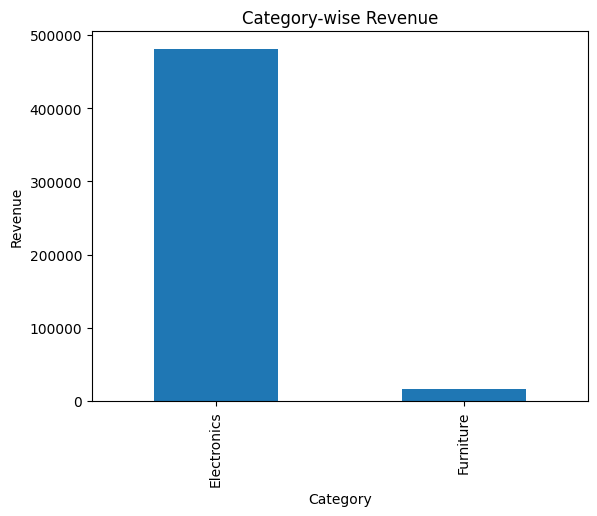

In [38]:
category_revenue.plot(kind = 'bar')
plt.title('Category-wise Revenue')
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

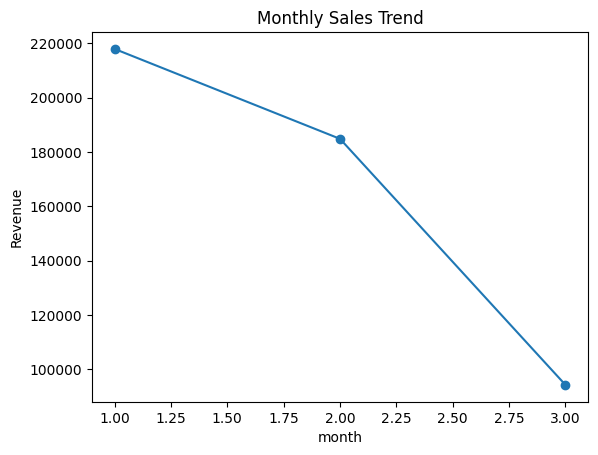

In [39]:
monthly_sales.plot(kind = 'line', marker = 'o')
plt.title("Monthly Sales Trend")
plt.xlabel("month")
plt.ylabel("Revenue")
plt.show()

## Conclusion
The analysis shows clear seasonal patterns in sales, with certain months generating higher revenue.